In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import os
import glob
import scipy as sp
from scipy.stats import pearsonr
# import patchworklib as pw 
# pw.overwrite_axisgrid()
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [27]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Nimbus Sans",
    'font.size':14,
    'axes.linewidth':2,
    'xtick.major.size':4,
    'ytick.major.size':4,
    'xtick.major.width':2,
    'ytick.major.width':2
})

In [28]:
df=pd.read_csv("Figure2A/HYBRID_HIPS_V3.5_ALLPLOTS.csv")
df

,Unnamed: 0,qrCode,location,sublocation,irrigationProvided,nitrogenTreatment,poundsOfNitrogenPerAcre,experiment,plotLength,totalStandCount,...,percentStarch,percentProtein,percentOil,percentFiber,percentAsh,kernelColor,percentLodging,harvestDate,notes,rangeRow
0,0,22-A-1583799,Ames,Ames B1,0.0,Medium,150.0,LC_4232,17.5,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2022-10-16,Check;Tattoo sensor,2-17
1,1,22-A-1583800,Ames,Ames B1,0.0,Medium,150.0,LC_4232,17.5,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2022-10-16,Check;Tattoo sensor,2-18
2,2,22-A-1583801,Ames,Ames B1,0.0,Medium,150.0,LC_4232,17.5,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2022-10-16,Check;Tattoo sensor,2-19
3,3,22-A-1583802,Ames,Ames B1,0.0,Medium,150.0,LC_4232,17.5,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.2,2022-10-16,Check;Tattoo sensor,2-20
4,4,22-A-1583804,Ames,Ames B1,0.0,Medium,150.0,LC_4232,17.5,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2022-10-16,Check;Tattoo sensor,2-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0,NaN,Scottsbluff,NaN,NaN,High,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23-26
4045,1,NaN,Scottsbluff,NaN,NaN,High,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-26
4046,2,NaN,Scottsbluff,NaN,NaN,High,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-26
4047,3,NaN,Scottsbluff,NaN,NaN,High,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-26


In [29]:
df.location.value_counts()

location
North Platte3      638
North Platte1      560
North Platte2      560
Ames               536
Lincoln            532
Scottsbluff        525
Crawfordsville     522
Missouri Valley    176
Name: count, dtype: int64

In [30]:
df[['location','totalStandCount']].describe()

,totalStandCount
count,2711.000000
mean,61.919218
std,6.277392
min,14.000000
25%,60.000000
50%,63.000000
75%,66.000000
max,78.000000


/home/schnablelab/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/schnablelab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/schnablelab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_7606/3769160915.py:48: UserWarning: FixedFormatter should only be

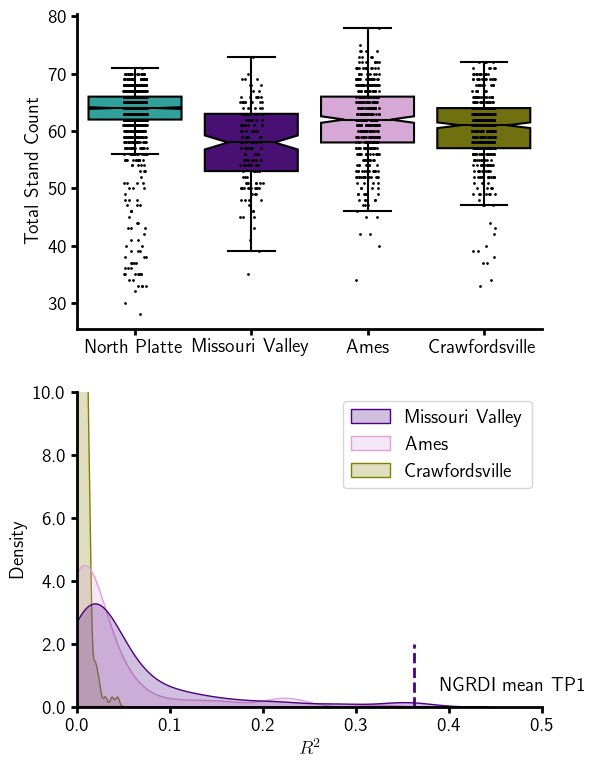

In [31]:
# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 100,
#        'color':"black"}
# sns.set_context(rc = {'patch.linewidth': 0})
# sns.set_theme(style="ticks", rc={"axes.grid": False})
# sns.set_style({'axes.linewidth': 2,'axes.edgecolor': 'black'})

colors = {'Scottsbluff':'darkorange','Lincoln':'royalblue','Missouri Valley':'indigo','Ames':'plum', 'Crawfordsville':'olive', 'North Platte':'lightseagreen'}
##########################################Figure2A#########################################3
df=pd.read_csv("Figure2A/HYBRID_HIPS_V3.5_ALLPLOTS.csv")
dic = {'North Platte1':'North Platte', 'North Platte2':'North Platte', 'North Platte3':'North Platte'}
df['location'] = df['location'].replace(dic)
fig=plt.figure(figsize=(6,9))

df=df.dropna(subset=['totalStandCount'], axis=0)

ax1=fig.add_subplot(2,1,1)
# fig.tight_layout(h_pad=2)
# gs = fig.add_gridspec(2,1)
# ax1=fig.add_subplot(2,2,1)


custom_order = ['North Platte', 'Missouri Valley', 'Ames', 'Crawfordsville']

# Reorder the DataFrame based on custom order
df['location'] = pd.Categorical(df['location'], custom_order)
df = df.sort_values('location')
df=df[df['totalStandCount']>25]

PROPS = {
    'boxprops':{'edgecolor':'black'},
   'medianprops':{'color':'black'},
   'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
flierprops = dict(marker='o', markerfacecolor='white', markersize=0, linestyle='none')

ax1=sns.boxplot(data=df, y='totalStandCount', x='location', color="lightseagreen",notch=True, 
                **PROPS, flierprops=flierprops,
                 order=[ 'North Platte', 'Missouri Valley', 'Ames', 'Crawfordsville'],palette=colors)
sns.stripplot(x=df["location"], y=df['totalStandCount'],s=2, color="black", jitter=0.1,order=[ 'North Platte', 'Missouri Valley', 'Ames', 'Crawfordsville'])
xticks=ax1.get_xticks()
yticks=ax1.get_yticks()

# reg.set_xticks(xticks)
# ax.set_xticklabels([round(x) for x in xticks])
ax1.set_yticklabels([round(y) for y in yticks])
plt.ylabel("Total Stand Count")
plt.xlabel(None)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("black")
ax1.spines['bottom'].set_color("black")


# plt.savefig("Figure2A.png", dpi=350)


#########################################2B#################3

correlation=pd.read_csv("Correlationeachparamallloaction_totalstandcount_newversion.csv")
# correlation=correlation.drop(correlation.loc[correlation['location']=='North Platte'], axis=0)
correlation['location']=correlation['location'].replace({'Movalley':'Missouri Valley'})
colors = {'Scottsbluff':'darkorange','Lincoln':'royalblue','Missouri Valley':'indigo','Ames':'plum', 'Crawfordsville':'olive'}
# colors = ['darkorange', 'royalblue', 'indigo','plum', 'olive']
sns.set_palette("colorblind")

ax2=fig.add_subplot(2,1,2)

ax2=sns.kdeplot(data=correlation, x='R2', hue='location', fill=True, 
                hue_order=['Missouri Valley', 'Ames', 'Crawfordsville'],palette=colors)
plt.xlim(0, 0.5)
plt.ylim(0, 10)
xticks=ax2.get_xticks()
yticks=ax2.get_yticks()

ax2.set_xticks(xticks)
ax2.set_xticklabels([round(x,2) for x in xticks])
ax2.set_yticklabels([round(y,2) for y in yticks])
plt.xlabel(f'$R^2$')
# plt.legend()
# plt.savefig("groupplot.png")

plt.vlines(x=correlation['R2'].max(),ymin=0,ymax=2,color='indigo', linestyles='--', linewidth=2)

mm=correlation['R2'].max()
name=correlation.loc[correlation['R2']==mm,]['signalname'].values[0]
name=name.replace("_"," ")
plt.text(0.39,0.5,name, fontsize=14)
ax = plt.gca()

# Remove the top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("black")
ax2.spines['bottom'].set_color("black")

ax2.legend_.set_title(None)

####################################Figure2D#################################################

plt.savefig("Figure2AandB_standcount.svg", dpi=350, bbox_inches='tight')
plt.show()

/home/schnablelab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/schnablelab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_7606/3900992796.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y) for y in yticks])


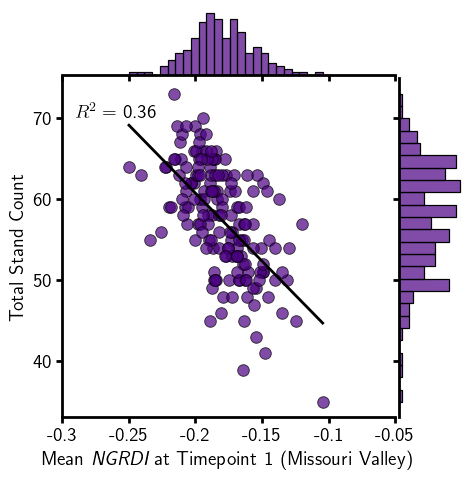

In [39]:
# plt.figure(figsize=(100,8))
Figure2D=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Movalley/Satelliteimages/sixband/SatelliteImage_6bands_TP1_genotype.csv")
Figure2D=Figure2D[["file_",'totalStandCount','NGRDI_mean']]

joingrid=sns.jointplot(data = Figure2D, x = "NGRDI_mean", y = "totalStandCount", kind='scatter', 
                       color='indigo', edgecolor="black", s=70,marginal_kws=dict(bins=25, fill=True, alpha=0.7),joint_kws=dict(alpha=0.7), 
                       space=0.05, ratio=5,height=5)
sns.regplot(x="NGRDI_mean", y="totalStandCount", data=Figure2D, color='indigo', scatter_kws={'alpha':0.5,'s':0},
           line_kws={'lw': 2, 'color': 'black'}, ci=None)
plt.text(x=-0.29,y=70,s=f'$R^2=$ {round(mm,2)}')
ax = joingrid.ax_joint
# ax.set_xlim(0.22,0.35)
xticks=ax.get_xticks()
yticks=ax.get_yticks()

ax.set_ylabel("Total Stand Count")
ax.set_xlabel(r"Mean $\textit{NGRDI}$ at Timepoint 1 (Missouri Valley)")

ax.set_xticks(xticks)
ax.set_xticklabels([round(x,2) for x in xticks])
ax.set_yticklabels([round(y) for y in yticks])
# ax.plot(sns.scatterplot, sns.histplot, kind='reg')
plt.savefig("Figure2C_standcount.svg", dpi=350, bbox_inches='tight')
plt.show()

7 44
176


/tmp/ipykernel_7606/2918808638.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([round(c) for c in sbarticks])
/tmp/ipykernel_7606/2918808638.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([round(c) for c in sbarticks])


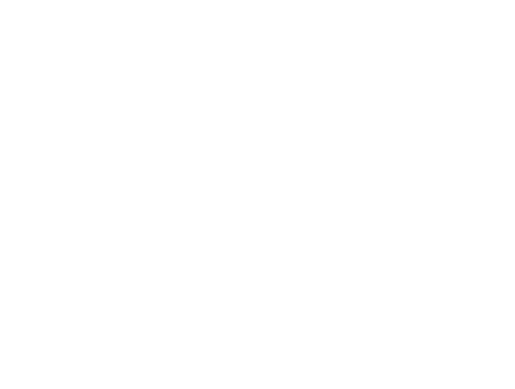

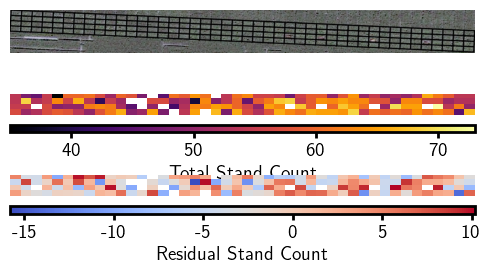

In [48]:
##Missorurivalley
#####Original Figure#3

import rasterio

raster=rasterio.open('/home/schnablelab/FieldExtracted/6Bnd/MOValley-TP3-Hybrids_1_1.TIF')
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(3)
red = raster.read(1)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
MissouriValley = np.dstack((red_norm, green_norm,nir_norm))

# View the color composite
plt.axis('off')
black_pixels = np.where(
    (MissouriValley[:, :, 0] == 0) & 
    (MissouriValley[:, :, 1] == 0) & 
    (MissouriValley[:, :, 2] == 0)
)
MissouriValley=cv.imread("/home/schnablelab/Downloads/Movalley.PNG")

# set those pixels to white
# MissouriValley[black_pixels] = [255, 255, 255]

fig=plt.figure(figsize=(6,3))

ax=fig.add_subplot(3,1,1)
plt.axis('off')
ax=plt.imshow(MissouriValley)

##########Figure2D
Hipsdf=pd.read_csv('Figure2D_totalstandcount.csv')

Hipsdf=Hipsdf.sort_values(by=["range", "row"])
rows=Hipsdf['range'].max()-Hipsdf['range'].min()+1
columns=Hipsdf['row'].max()-Hipsdf['row'].min()+1

print(rows,columns)

#
df = np.zeros((4*11, columns*22))
stop=df.shape[1]
start_col=0
start_row=0

cols_pix=22
row_pix=11

n=0
count=0
rowcount=0
for trait in Hipsdf.totalStandCount.values:
    # print(row_pix)
    if math.isnan(trait):
        df[start_row:row_pix+1,start_col:cols_pix+1,]=np.nan####( or 0 if I want to assign zero)
        count=count+1
        # print(count)
    else:
        df[start_row:row_pix+1,start_col:cols_pix+1]=trait
    # print(df[start_row:row_pix, start_col:cols_pix].shape)
    rowcount+=1
    # print(rowcount)

            
    start_col=cols_pix
    cols_pix+=22
    # print(cols_pix)
    
    if cols_pix==(stop+22):
        start_row=row_pix
        row_pix+=11
        start_col=0
        cols_pix=22
    n+=1

from mpl_toolkits.axes_grid1 import make_axes_locatable
print(n)

# fig=plt.figure(figsize=(7,2))
ax=fig.add_subplot(3,1,2)
ax = plt.gca()

plt.axis('off')
im=plt.imshow(df,interpolation='nearest', cmap="inferno")

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="35%", pad=0.1)

cbar=plt.colorbar(im,orientation="horizontal", cax=cax)
cbar.set_label('Total Stand Count')

sbarticks=cbar.get_ticks()
cbar.set_ticklabels([round(c) for c in sbarticks])


#####################Figure@D################3
df = np.zeros((4*11, columns*22))
stop=df.shape[1]
start_col=0
start_row=0

cols_pix=22
row_pix=11

n=0
count=0
rowcount=0
for trait in Hipsdf.residual.values:
    if math.isnan(trait):
        df[start_row:row_pix+1,start_col:cols_pix+1,]=np.nan####( or 0 if I want to assign zero)
        count=count+1
        # print(count)
    else:
        # print((start_row),(row_pix+1))
        df[start_row:row_pix+1,start_col:cols_pix+1]=trait
    # print(df[start_row:row_pix, start_col:cols_pix].shape)
    rowcount+=1
    # print(rowcount)

            
    start_col=cols_pix
    cols_pix+=22
    # print(cols_pix)
    # print(cols_pix)
    if cols_pix==(stop+22):
        start_row=row_pix
        row_pix+=11
        start_col=0
        cols_pix=22
    n+=1

from mpl_toolkits.axes_grid1 import make_axes_locatable
# print(n)

ax=fig.add_subplot(3,1,3)
ax = plt.gca()

plt.axis('off')
im=plt.imshow(df,interpolation='nearest', cmap="coolwarm")

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="35%", pad=0.1)

cbar=plt.colorbar(im,orientation="horizontal", cax=cax) 
cbar.set_label('Residual Stand Count')
sbarticks=cbar.get_ticks()
cbar.set_ticklabels([round(c) for c in sbarticks])

plt.savefig('Movalley_totalsatndcount_residual.svg', dpi=350, bbox_inches='tight')
# plt.imshow()

In [44]:
Hipsdf.columns

Index(['index', 'qrCode', 'location', 'sublocation', 'irrigationProvided',
       'nitrogenTreatment', 'poundsOfNitrogenPerAcre', 'experiment',
       'plotLength', 'totalStandCount', 'block', 'row_x', 'range_x',
       'plotNumber', 'genotype', 'plantingDate', 'anthesisDate', 'silkDate',
       'daysToAnthesis', 'daysToSilk', 'anthesisSilkingInterval',
       'GDDToAnthesis', 'GDDToSilk', 'anthesisSilkingIntervalGDD', 'earHeight',
       'flagLeafHeight', 'plantDensity', 'combineYield', 'yieldPerAcre',
       'combineMoisture', 'combineTestWeight', 'earLength', 'earFillLength',
       'earWidth', 'shelledCobWidth', 'kernelsPerRow', 'kernelRowNumber',
       'kernelsPerEar', 'hundredKernelMass', 'kernelMassPerEar',
       'shelledCobMass', 'percentMoisture', 'percentStarch', 'percentProtein',
       'percentOil', 'percentFiber', 'percentAsh', 'kernelColor',
       'percentLodging', 'harvestDate', 'notes', 'rangeRow', 'file_',
       'NGRDI_mean', 'range_y', 'row_y', 'predicted', 'resid

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


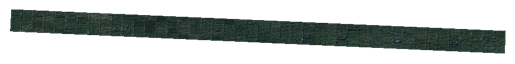

In [6]:
import rasterio

raster=rasterio.open('/home/schnablelab/FieldExtracted/6Bnd/MOValley-TP3-Hybrids_1_1.TIF')
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(3)
red = raster.read(1)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((red_norm, green_norm,nir_norm))

MossouriValley=nrg
# View the color composite
plt.axis('off')
black_pixels = np.where(
    (MossouriValley[:, :, 0] == 0) & 
    (MossouriValley[:, :, 1] == 0) & 
    (MossouriValley[:, :, 2] == 0)
)

# set those pixels to white
MossouriValley[black_pixels] = [255, 255, 255]
# plt.axis('off')
plt.imshow(MossouriValley)

In [21]:
correlation=[]
locations=['Ames',"Movalley",'Crawfordsville']
for lo in locations:
    path=f"/home/schnablelab/Documents/NNSatelliteImages/Data/{lo}/Satelliteimages/sixband/"

    location=path.split('/')[6]

    files=os.listdir(path)

    for file in files:
        # print(file)

        if file.endswith('_genotype.csv'):
            timepoint=file.split('_')[2].split('.')[0]
            # print(timepoint)

            filepath=os.path.join(path, file)
            df=pd.read_csv(filepath)
            df=df[df['totalStandCount']>25]

            pattern=['mean', 'median', 'sum']
            features=df.columns

            xaxis=[]

            for p in pattern:
                for f in features:
                    if p in f:
                        xaxis.append(f)
                        # print(f)

            trait='totalStandCount'

            for x in xaxis:

                signalname=f'{x}_{timepoint}'
                # print(signalname)
                corrdf=df[[x,trait]]
                corrdf=corrdf.dropna()
                # print(len(corrdf))
                # print(corrdf[x])

                corrdf.columns=['signal', 'trait']

                r,p = sp.stats.pearsonr(corrdf['signal'], corrdf['trait'])

                r2 =r**2

                correlation.append(
                    {'signalname':signalname,
                     'R2':r2,
                     'location':location
                    })

correlation=pd.DataFrame(correlation)
# correlation.to_csv()
correlation.to_csv("Correlationeachparamallloaction_totalstandcount_newversion.csv", index=False)

In [46]:
df=pd.read_csv('/home/schnablelab/Documents/NNSatelliteImages/Data/Movalley/Satelliteimages/sixband/SatelliteImage_6bands_TP1_genotype.csv')
df=df[['file_','NGRDI_mean','totalStandCount','range','row']]
df=df.dropna(subset='totalStandCount')
df
from sklearn.linear_model import LinearRegression as LR
model=LR()
model.fit(df['NGRDI_mean'].values.reshape(-1,1),df['totalStandCount'])
predicted=model.predict(df['NGRDI_mean'].values.reshape(-1,1))

df['predicted']=predicted
df['residual']=df['totalStandCount']-df['predicted']

location="Missouri Valley"
Hipsdf=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/HYBRID_HIPS_V3.5_ALLPLOTS.csv", sep=",")
Hipsdf=Hipsdf.loc[(Hipsdf["location"]==location),]

Hipsdf=pd.merge(Hipsdf, df, left_on=['row','range','totalStandCount'], right_on=['range','row','totalStandCount'], how='outer')

# Hipsdf=Hipsdf.sort_values(by=["range", "row"])
Hipsdf.to_csv('Figure2D_totalstandcount.csv', index=False)

##Go and change range to row and row to range

In [20]:
correlation

,signalname,R2,location
0,Red_mean_TP1,0.008296,Ames
1,Green_mean_TP1,0.043790,Ames
2,Blue_mean_TP1,0.006151,Ames
3,GLI_mean_TP1,0.115155,Ames
4,GRVI_mean_TP1,0.116265,Ames
...,...,...,...
697,SAVI_sum_TP5,0.008421,Crawfordsville
698,NDRE_sum_TP5,0.006541,Crawfordsville
699,RedEdge_sum_TP5,0.005010,Crawfordsville
700,DeepBlue_sum_TP5,0.001204,Crawfordsville
